In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

## Load Data

(512, 512)

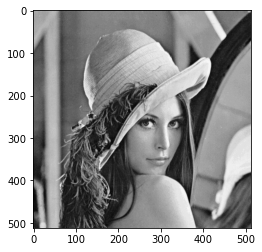

In [3]:
img_plt = cv2.imread("lenna.jpg",0)
plt.imshow(img_plt,cmap='gray')
img_plt.shape


## Pre-Process
prepare the data set  
$E(x) = 0 $ 

In [4]:
def standardization(data):
    mu = np.mean(data, axis=0)
    return data - mu

 
X =[]
block = 32
row,col = 512//block,512//block
for i in range(row):
    for j in range(col):
        x_i = img_plt[block*i:block*(i+1),block*j:block*(j+1)].reshape(-1,)
        X.append(standardization(x_i))


    
Data =np.array(X)
data_length = len(Data)
print(Data.shape,f"length of Data:{data_length}")


(256, 1024) length of Data:256


## Training
Find the principal component $w$  
$y = w^Tx$  
$w(k+1) = w(k)+u(k)[y(k)x(k)-y^2(k)w(k)]$

In [5]:

dim = block*block

def pca(x):
   u = 1e-7
   w = 0.1*np.random.rand(dim,1)
   track = 0 
   while True:
      try :
         y=w.T@x
         w =  w+u*(y*x.reshape((dim,1))-w*y*y)
      except  RuntimeWarning:
         print(w)
         u =u/10
         continue
      norm = sum(w**2)
      if np.abs(norm)[0]==track: 
         break
      track = norm[0]
   print(f"track : {track:.2f}")
   return w


w_list =[]
for index ,x_i in enumerate(Data):
   print(f"index: {index}",end=" ")
   w_list.append(pca(x_i))

index: 0 track : 1.00
index: 1 track : 1.00
index: 2 track : 1.00
index: 3 track : 1.00
index: 4 track : 1.00
index: 5 track : 1.00
index: 6 track : 1.00
index: 7 track : 1.00
index: 8 track : 1.00
index: 9 track : 1.00
index: 10 track : 1.00
index: 11 track : 1.00
index: 12 track : 1.00
index: 13 track : 1.00
index: 14 track : 1.00
index: 15 track : 1.00
index: 16 track : 1.00
index: 17 track : 1.00
index: 18 track : 1.00
index: 19 track : 1.00
index: 20 track : 1.00
index: 21 track : 1.00
index: 22 track : 1.00
index: 23 track : 1.00
index: 24 track : 1.00
index: 25 track : 1.00
index: 26 track : 1.00
index: 27 track : 1.00
index: 28 track : 1.00
index: 29 track : 1.00
index: 30 track : 1.00
index: 31 track : 1.00
index: 32 track : 1.00
index: 33 track : 1.00
index: 34 track : 1.00
index: 35 track : 1.00
index: 36 track : 1.00
index: 37 track : 1.00
index: 38 track : 1.00
index: 39 track : 1.00
index: 40 track : 1.00
index: 41 track : 1.00
index: 42 track : 1.00
index: 43 track : 1.0

## Compress the image
$\mathbf{y}_{test} = w^{T}x$

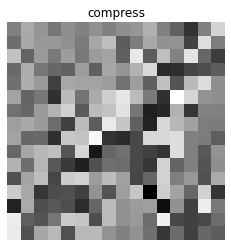

In [29]:
"""
Data : [data_length,feature_dim]
w    : [feature_dim,1] 
y_test: [1,data_length] 

"""
y_test = np.zeros((1,data_length))
for index, x_i in enumerate(Data):
    y_test[:,index] =w_list[index].T@x_i

img_test= y_test.reshape((row,col))

plt.title("compress")
plt.axis("off")
plt.imshow(img_test,cmap='gray')


## Recontrust the image
$\mathbf{x}_{test} = wy$

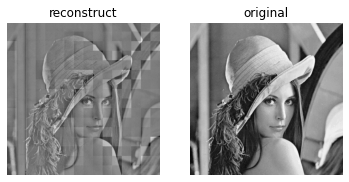

In [32]:
""" 
w      : [feature_dim,1]   
y_test : [1,data_length] 
X_test : [data_length,feature_dim]

"""
X_test =[]
for index,w in enumerate(w_list):
    X_test.append(w*y_test[:,index])

X_test = np.array(X_test)
img_reconstruct =np.zeros((512,512))

for i in range(row):
    for j in range(col):
        img_reconstruct[block*i:block*(i+1),block*j:block*(j+1)] = X_test[j+i*col,:].reshape((block,block))
        
plt.subplot(1,2,1)
plt.title("reconstruct")
plt.axis("off") 
plt.imshow(img_reconstruct,cmap='gray')
plt.subplot(1,2,2)
plt.title("original")
plt.axis("off") 
plt.imshow(img_plt,cmap='gray')
